In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/raw/02_Used_Car_Prices.xlsx')

In [3]:
df.head()

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,1774000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Model        6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price (INR Lakhs)  6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [5]:
df.shape

(6019, 12)

In [6]:
df.rename(columns={'Price (INR Lakhs)': 'Price'}, inplace=True)

In [7]:
df.isnull().sum()

Brand_Model           0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dropna(subset=['Engine', 'Power', 'Seats'], inplace=True)

In [10]:
df['Mileage'] = df['Mileage'].str.replace(' kmpl','').str.replace(' km/kg','')
df['Power'] = df['Power'].str.replace(' bhp','')
df['Engine'] = df['Engine'].str.replace(' CC','')

In [11]:
df[df['Power']=='null']

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,null,5.0,200000.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null,5.0,130000.0
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null,5.0,210000.0
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,null,5.0,85000.0
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,null,5.0,167000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,17.0,1086,null,5.0,185000.0
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0,1086,null,5.0,120000.0
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5,1798,null,5.0,285000.0
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112,null,6.0,170000.0


In [12]:
df = df[df['Power']!='null']

In [13]:
df['Mileage'] = df['Mileage'].astype(float)
df['Power'] = df['Power'].astype(float)
df['Engine'] = df['Engine'].astype(float)

In [14]:
df.shape

(5874, 12)

In [15]:
df.head()

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0


In [16]:
df['Car_Age'] = 2025 - df['Year']
df['km/year'] = df['Kilometers_Driven'] / df['Car_Age']

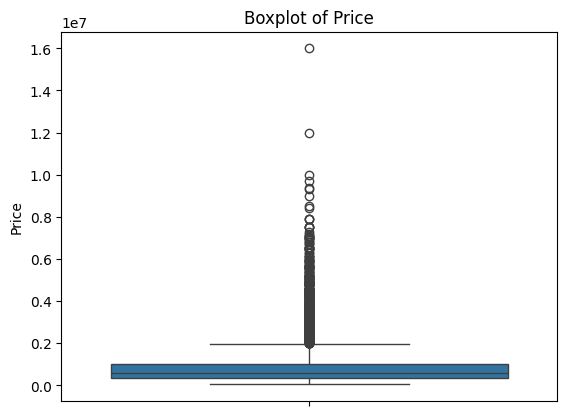

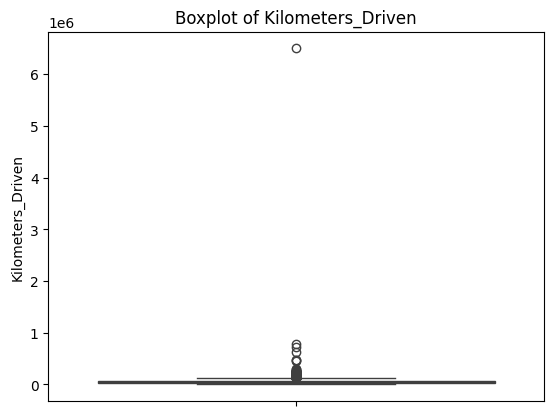

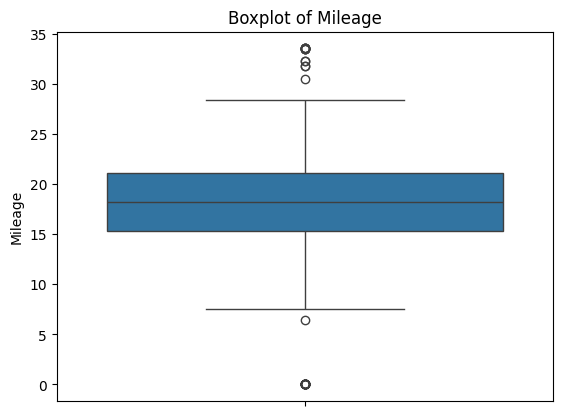

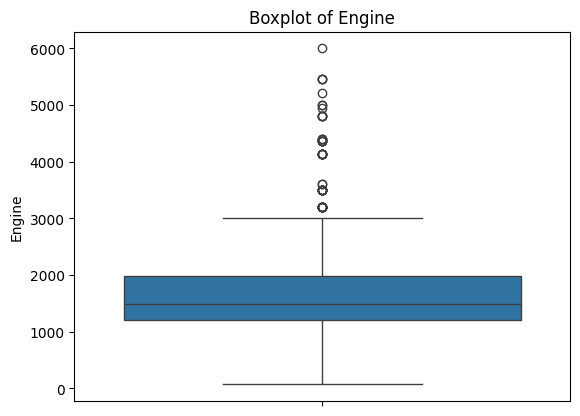

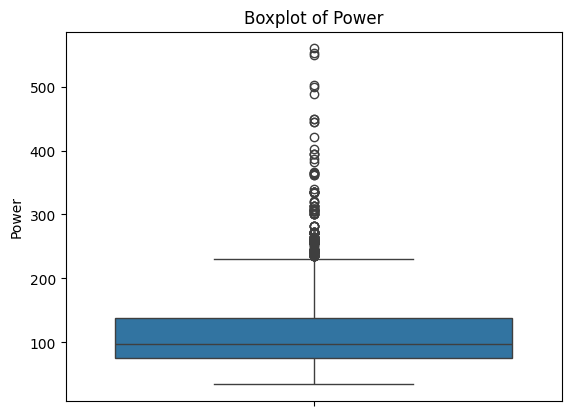

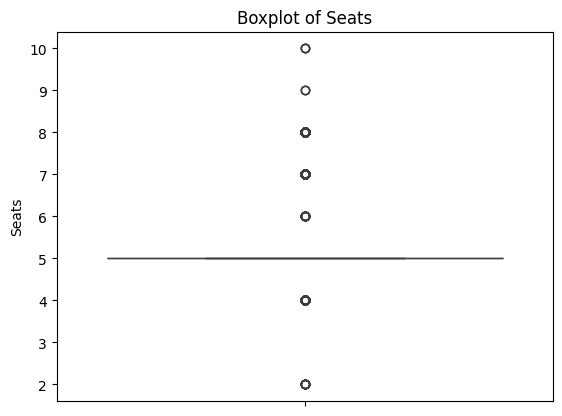

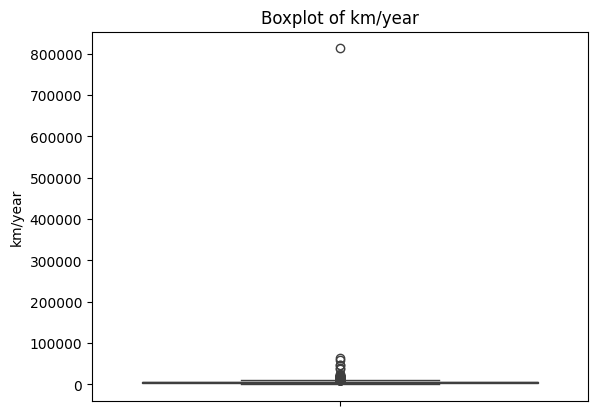

In [17]:
numeric_cols = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'km/year']

for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [18]:
df.sort_values('Price', ascending=False).head()

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,km/year
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,16000000.0,8,3125.000000
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,12000000.0,14,464.285714
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,10000000.0,10,800.000000
1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.0,5.0,9707000.0,6,4335.500000
1974,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05,2979.0,320.0,5.0,9367000.0,7,4008.571429


In [19]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Outliers removed:', len(df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]))
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

Outliers removed: 707


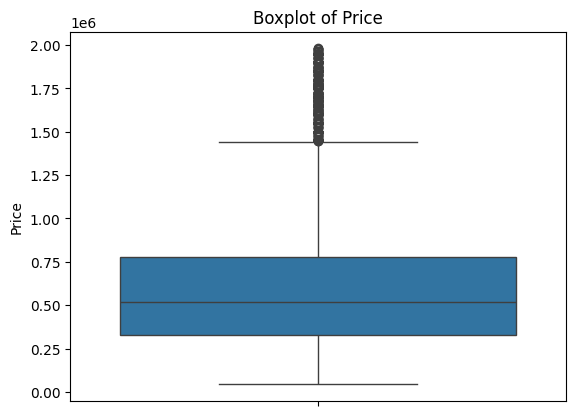

In [20]:
plt.figure()
sns.boxplot(data=df, y='Price')
plt.title(f'Boxplot of Price')
plt.show()

In [21]:
df[df['km/year']>30000]

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,km/year
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,750000.0,12,64583.333333
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,270000.0,16,38750.000000
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,590000.0,12,60000.000000
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,1300000.0,10,48000.000000
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,500000.0,10,48000.000000
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,445000.0,12,37083.333333


In [22]:
print('Outliers removed:', len(df[df['km/year']>30000]))
df = df[df['km/year']<30000]

Outliers removed: 6


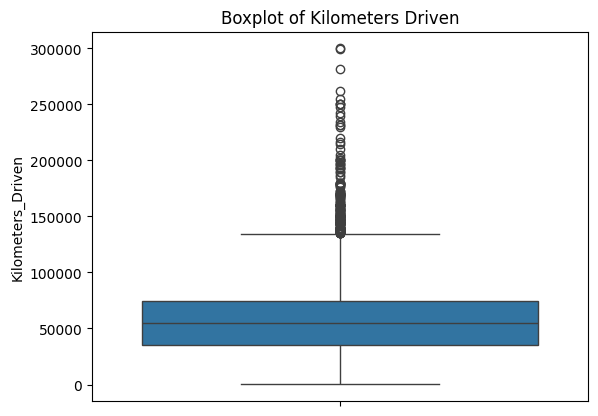

In [23]:
plt.figure()
sns.boxplot(data=df, y='Kilometers_Driven')
plt.title(f'Boxplot of Kilometers Driven')
plt.show()

In [24]:
print('Outliers removed:', len(df[df['Mileage']==0]))
df = df[df['Mileage']!= 0]

Outliers removed: 14


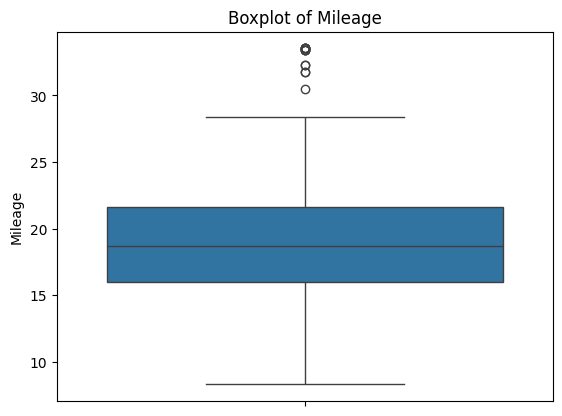

In [25]:
plt.figure()
sns.boxplot(data=df, y='Mileage')
plt.title(f'Boxplot of Mileage')
plt.show()

In [26]:
print('Outliers removed:', len(df[df['Power']>400]))
df = df[df['Power']<=400]

Outliers removed: 1


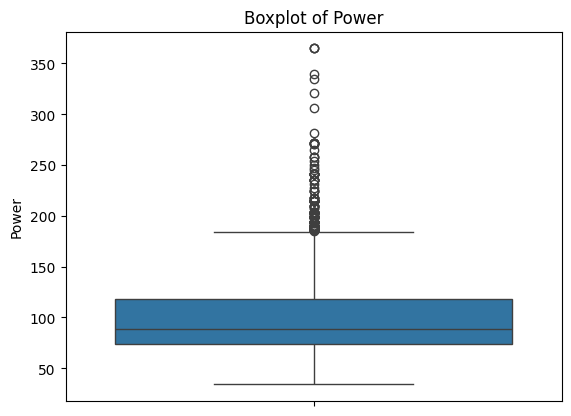

In [27]:
plt.figure()
sns.boxplot(data=df, y='Power')
plt.title(f'Boxplot of Power')
plt.show()

In [28]:
# Replace 'Land Rover' temporarily
df['Brand_Model'] = df['Brand_Model'].str.replace('Land Rover', 'Land-Rover')

# Split by first space
df[['Brand', 'Model']] = df['Brand_Model'].str.split(' ', n=1, expand=True)

# Restore 'Land Rover' formatting
df['Brand'] = df['Brand'].str.replace('Land-Rover', 'Land Rover')

In [29]:
df.drop('Brand_Model', axis=1, inplace=True)

In [30]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,km/year,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0,15,4800.000000,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0,10,4100.000000,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0,14,3285.714286,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0,13,6692.307692,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0,12,3389.166667,Audi,A4 New 2.0 TDI Multitronic


In [31]:
df.to_csv('../data/processed/clean_used_car_prices.csv', index=False)

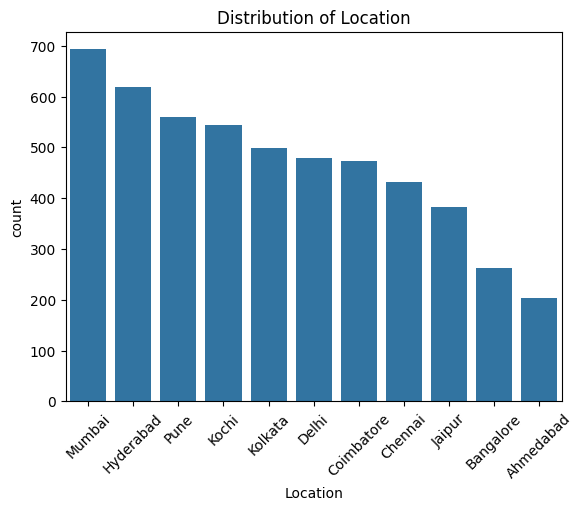

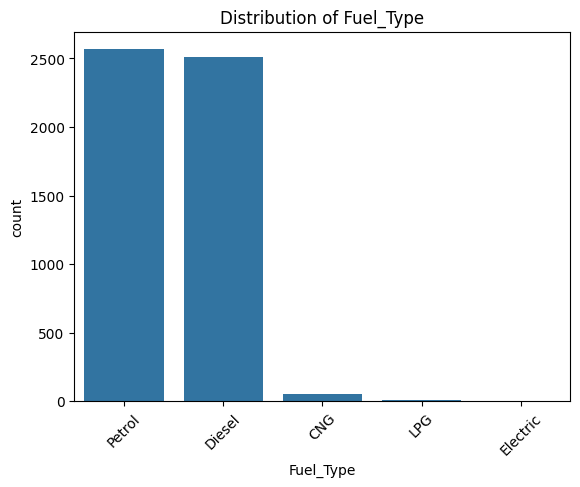

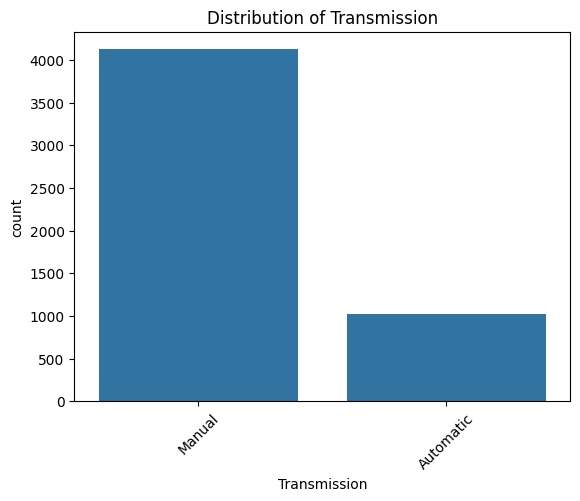

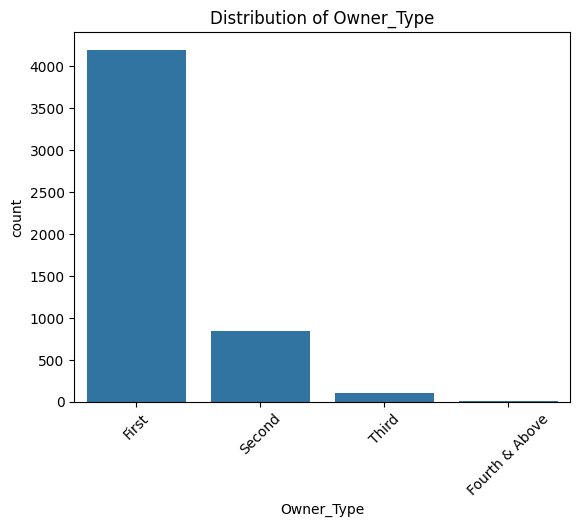

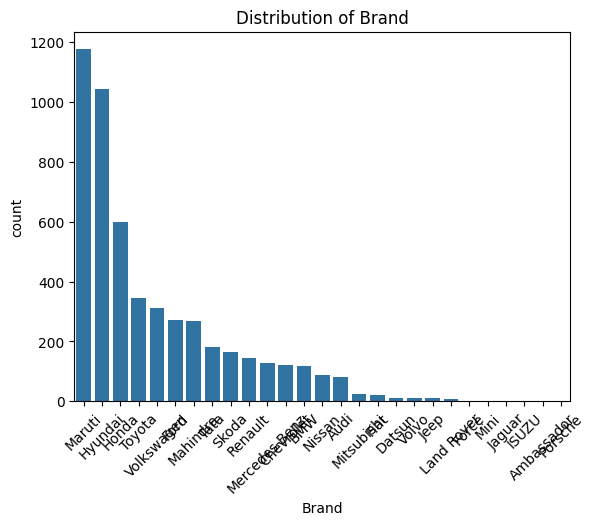

In [32]:
categorical_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

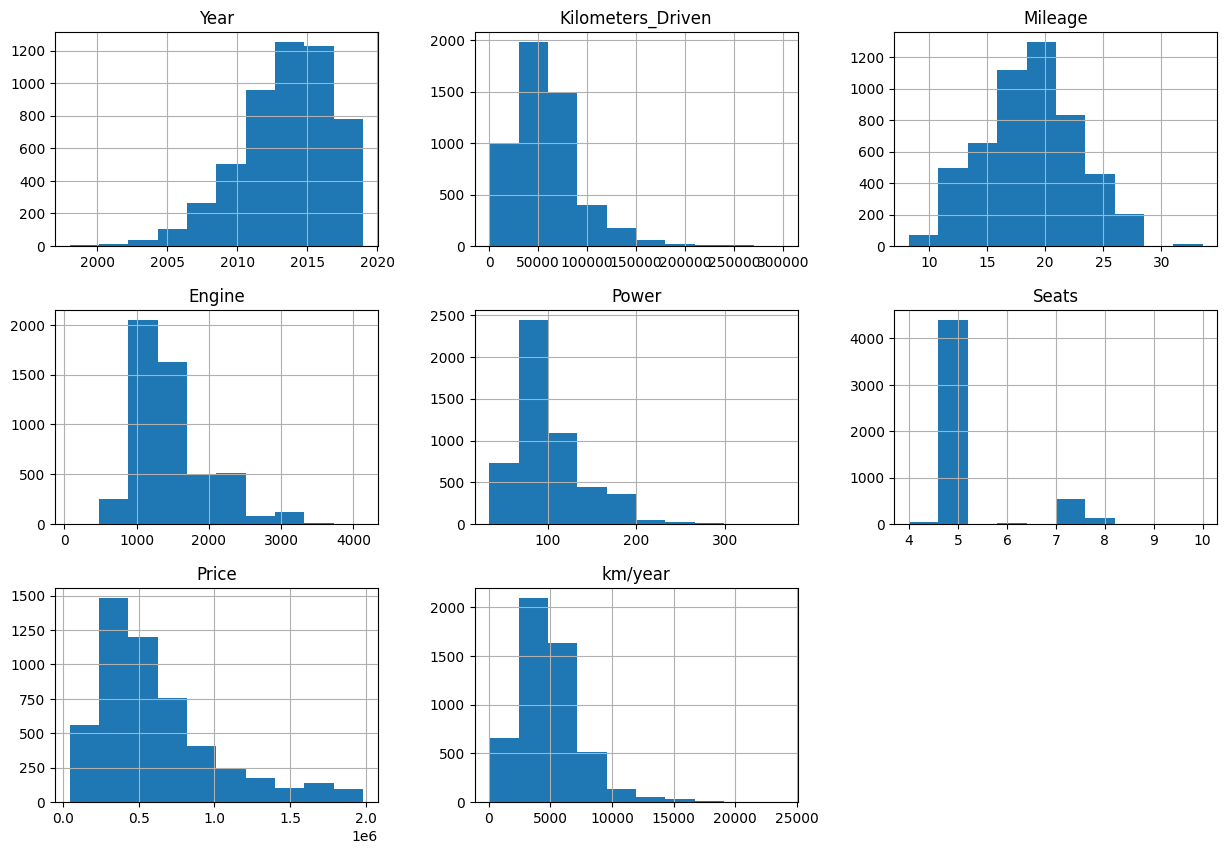

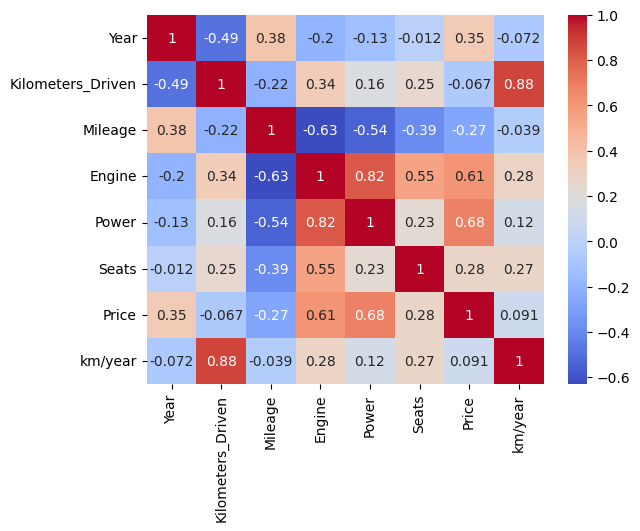

In [33]:
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'km/year']

# Histograms
df[numeric_cols].hist(figsize=(15,10), bins=10)
plt.show()

# Correlation
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()